# Define PWS-BRAIN phantom

multiplication of PWC-BRAIN phantom by smooth, bandlimited function

In [13]:
import torch
import numpy as np
import scipy
import matplotlib.pylab as plt

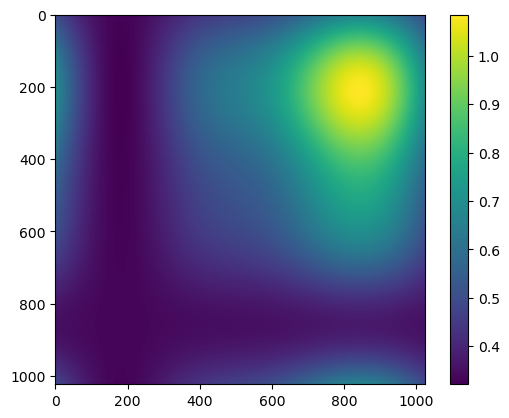

In [14]:
nx = 1024
res = (nx,nx) #image resolution over which to perform FFTs
freq = torch.fft.fftfreq(nx,d=1/nx)
freq_x,freq_y = torch.meshgrid(freq,freq)
mask_kernel_255 = (torch.max(torch.abs(freq_x),torch.abs(freq_y)) <= 2)

#create Gaussian, then restrict to 5x5 DFT coefficients
X,Y = torch.meshgrid(torch.linspace(0,1,nx),torch.linspace(0,1,nx))
tmp = torch.exp(-10*((X-0.2)**2+(Y-0.9)**2)/2)
tmp = tmp+0.5
tmp = tmp/1.5
tmp = torch.fft.fft2(tmp)
kernel = tmp[mask_kernel_255]
tmp = torch.zeros(res,dtype=torch.complex64)
tmp[mask_kernel_255] = kernel
tmp = torch.real(torch.fft.ifft2(tmp))
phi = tmp.numpy()

plt.imshow(phi)
plt.colorbar()
plt.show()

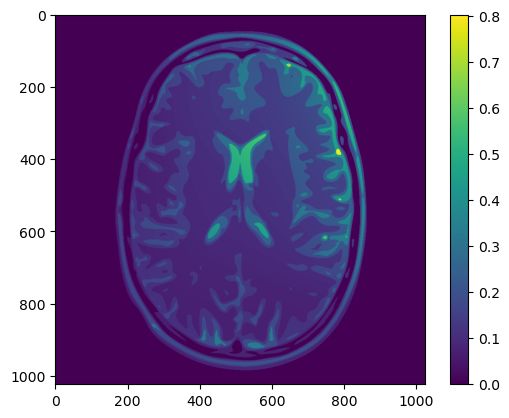

In [ ]:
x0 = np.load("PWC_BRAIN_lowpass_1024.npy")
x00 = np.load("PWC_BRAIN_rasterized_1024.npy")
x0new = x0*phi #new ideal low-pass image, equivlalent to convolution of Fourier coefficients with 5x5 filter
x00new = x00*phi #new rasterized phantom

plt.imshow(x00new)
plt.colorbar()
plt.show()

save images

In [15]:
np.save("PWS_BRAIN_rasterized_1024.npy",x00) 
np.save("PWS_BRAIN_lowpass_1024.npy",x0)